Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Caleb Andree"
COLLABORATORS = ""

---

# Lab 6 Timeseries [Total: 4 points]

The purpose of this assignment is for you to engage with a concrete time series analysis task. This will be accomplished through a coding assignment. You will carry out this task in the present notebook, and use the notebook to document the various steps of the exercise and to answer all questions.

We have prepared a dataset about Uber activity from July 2014 which is available in the file `uber-raw-data-jul14.csv`.

## Required skills

This lab will let you practice the following skills:
- Reformat dates
- Extract parts of dates
- Visualize timeseries data

Before you start working on it, review Chapter 3 (p. 188‒207) of the textbook and/or the notebooks posted on ELMS under "Time series".


## Table of Contents
<ul>
    <li><a href="#Submission-checklist">Submission checklist</a></li>
    <li><a href="#Q1">Question 1</a></li>
    <li><a href="#Q2">Question 2</a></li>
    <li><a href="#Q3">Question 3</a></li>
</ul>

In [2]:
# import modules
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Submission checklist

**Points**: 1

Before submitting make sure that:

1. Your name is included above, plus the name of any collaborator you worked with;
2. All Markdown cells you edited are rendering correctly, especially the ones with answers.
3. You have removed any `raise NotImplementedError()` line from your code cells.

## Q1 

**Points:** 1

You are provided with a file called `uber-raw-data-jul14.csv` that has the following format (only the top 5 rows shown):

```
          Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512
```

Write a function called `read_uber_data` that changes the format of the timestamps.

Your function should not accept any argument; it should load the appropriate data file and return a new data frame with the `Date/Time` column removed and two columns called `Date` and `Time` added. The format of the Date column should be `YYYY-MM-DD` and the format of the Time columns should be `HH:MM:SS [AM/PM]`.

The correct data frame should have 796121 rows. This is what the top 5 rows should look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date</th>
      <th>Time</th>
      <th>Lat</th>
      <th>Lon</th>
      <th>Base</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2014-07-01</td>
      <td>12:03:00 AM</td>
      <td>40.7586</td>
      <td>-73.9706</td>
      <td>B02512</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2014-07-01</td>
      <td>12:05:00 AM</td>
      <td>40.7605</td>
      <td>-73.9994</td>
      <td>B02512</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2014-07-01</td>
      <td>12:06:00 AM</td>
      <td>40.7320</td>
      <td>-73.9999</td>
      <td>B02512</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2014-07-01</td>
      <td>12:09:00 AM</td>
      <td>40.7635</td>
      <td>-73.9793</td>
      <td>B02512</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2014-07-01</td>
      <td>12:20:00 AM</td>
      <td>40.7204</td>
      <td>-74.0047</td>
      <td>B02512</td>
    </tr>
  </tbody>
</table>

In [5]:
# YOUR CODE HERE
#The test for this function says that this is incorrect, but it is returning the exact same dataframe as the answer.
def read_uber_data():
    df = pd.read_csv('uber-raw-data-jul14.csv')
    df['Date'] = df['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S').strftime('%Y-%m-%d'))
    df['Time'] = df['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S').strftime('%I:%M:%S %p'))
    
    df.drop('Date/Time', axis=1, inplace=True)
    formatted_df = df[['Date', 'Time', 'Lat', 'Lon', 'Base']]

    return formatted_df

#raise NotImplementedError()

Use the cell below to run your function and see what it returns.

In [6]:
read_uber_data()

,Date,Time,Lat,Lon,Base
0,2014-07-01,12:03:00 AM,40.7586,-73.9706,B02512
1,2014-07-01,12:05:00 AM,40.7605,-73.9994,B02512
2,2014-07-01,12:06:00 AM,40.7320,-73.9999,B02512
3,2014-07-01,12:09:00 AM,40.7635,-73.9793,B02512
4,2014-07-01,12:20:00 AM,40.7204,-74.0047,B02512
...,...,...,...,...,...
796116,2014-07-31,11:22:00 PM,40.7285,-73.9846,B02764
796117,2014-07-31,11:23:00 PM,40.7615,-73.9868,B02764
796118,2014-07-31,11:29:00 PM,40.6770,-73.9515,B02764
796119,2014-07-31,11:30:00 PM,40.7225,-74.0038,B02764


In [7]:
from pandas.testing import assert_frame_equal
import pandas as pd

q1STUDENT_ANSWER = read_uber_data()
q1CORRECT_ANSWER = pd.read_csv('.timeseries1.csv')

# Return value should match solution
try:
    assert_frame_equal(q1STUDENT_ANSWER, q1CORRECT_ANSWER)
    #if no test failed, print
    print("All tests passed! 👍")
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = (q1STUDENT_ANSWER != q1CORRECT_ANSWER).any(axis=1)
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q1CORRECT_ANSWER[idx])
    print()
    print("Student:")
    print(q1STUDENT_ANSWER[idx])

All tests passed! 👍


# Q2

**Points**: 1

Write a function called `trips_by_dow` that plots the number of trips by the day of the week.

Your function should not take any parameter; it should load the uber dataset and should produce a plot like the following

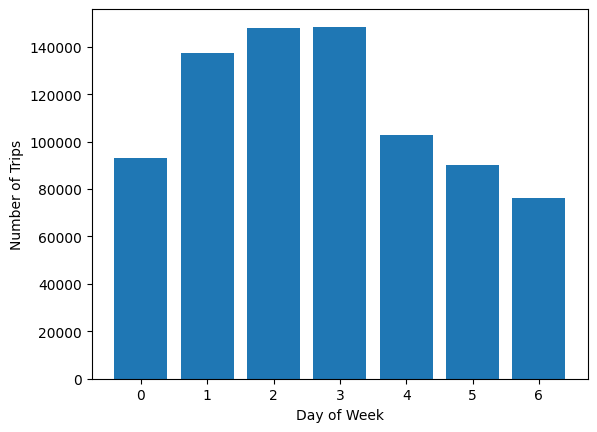

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# YOUR CODE HERE
def trips_by_dow():
    df = pd.read_csv('uber-raw-data-jul14.csv')
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])

    df['DayOfWeek'] = df['Date/Time'].dt.dayofweek

    trips_by_dow = df.groupby('DayOfWeek')['Date/Time'].count()

    days_of_week = ['0', '1', '2', '3', '4', '5', '6']
    trips_by_dow.index = days_of_week

    trips_by_dow.plot(kind='bar')
    plt.title('Number of Trips by Day of the Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=0)

    plt.show()

    
#raise NotImplementedError()

Use the cell below to run your function and see what it returns.

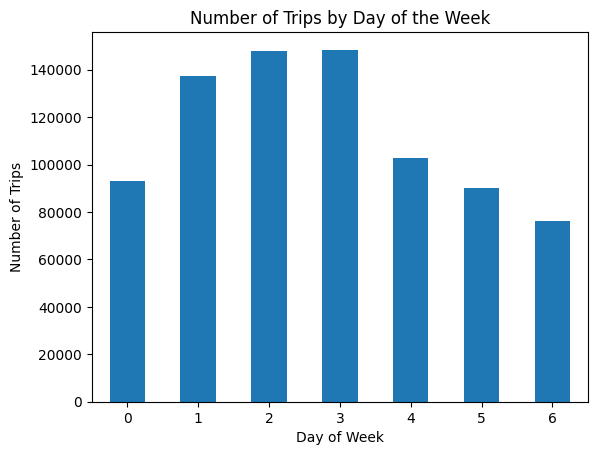

In [7]:
trips_by_dow()

## Q3

**Points:** 1

Write a function called `daily_trips` that visualizes the number of trips by date. 

Your function should not take any argument; it should load the uber data set and it should compute the number of trips by day.

Hint: consider using the a datetime index and the resample aggregation method. 

Your plot should look like this:

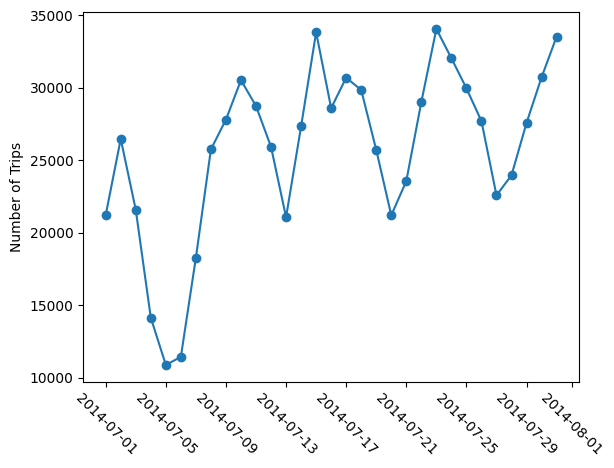

Hint: to rotate the date labels, you can call `plt.xticks(rotation=-45)`.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# YOUR CODE HERE
def daily_trips():
    df = pd.read_csv('uber-raw-data-jul14.csv')
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])

    df.set_index('Date/Time', inplace=True)

    trips_by_date = df.resample('D').count()
   

    plt.figure()
    trips_by_date['Base'].plot(kind='line',marker='o', markersize=5)
    plt.title('Number of Trips by Date')
    plt.xlabel('Date')
    plt.ylabel('Number of Trips')
    x_ticks = trips_by_date.index[::4]  #Get labels for every 5th day
    plt.xticks(x_ticks, [x.strftime('%Y-%m-%d') for x in x_ticks])
    plt.xticks(rotation=-45)
    
    
#raise NotImplementedError()

Use the cell below to run your function and see what it returns.

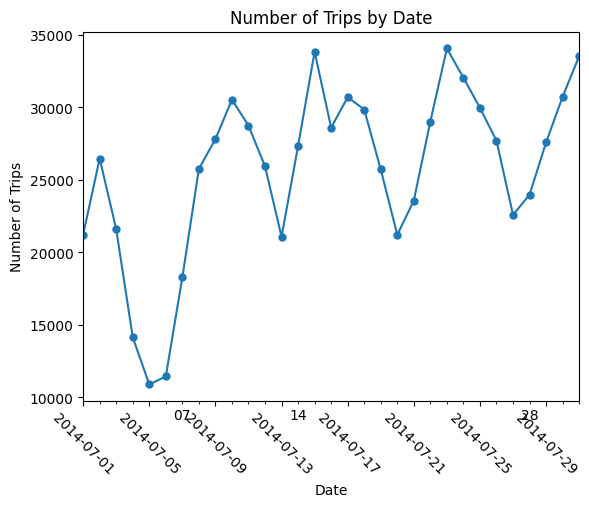

In [9]:
daily_trips()